In [1]:
import pandas as pd
import numpy as np
import tqdm
import os

import logging
logging.basicConfig(format='%(asctime)s [%(levelname)s] %(message)s',
                    level=logging.INFO)

import nltk
from nltk import FreqDist

from fuzzywuzzy import fuzz
from bs4 import BeautifulSoup
import lxml
import re

import datetime

In [2]:
df_ym = pd.read_csv("/Users/shashanksingh/Desktop/air_pollution/data/processed_data/yearly_air.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (21,35,38,50,55,61,63,65,66,67,68,69,70,71,72,73,74,75,76,77,90,92,95,101,103,105,106,109,110,111,112,113,114,115,116,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,142,143,144,150,151,152,153,154,155,158,161,198,199,200,231) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_mm = pd.read_csv("/Users/shashanksingh/Desktop/air_pollution/data/processed_data/monthly_air.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,102,103,104,105,106,109,110,111,112,113,114,115,116,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,142,143,144,150,151,152,153,154,155,158,159,160,161,198,199,200,201,202,210,229,230,231,327,328,329,330) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_ym["kanoon_id"].describe()

count    9.976000e+03
mean     5.673069e+07
std      6.367322e+07
min      1.320000e+03
25%      1.263420e+06
50%      2.997439e+07
75%      1.086100e+08
max      1.996413e+08
Name: kanoon_id, dtype: float64

In [5]:
df_ym["Kanoon_ID"].describe()

count    1.257600e+04
mean     6.660818e+07
std      6.604077e+07
min      1.320000e+03
25%      1.416566e+06
50%      5.109352e+07
75%      1.250607e+08
max      1.996413e+08
Name: Kanoon_ID, dtype: float64

In [6]:
root_raw_data = "/Users/shashanksingh/Desktop/air_pollution/data/raw_data"

In [7]:
#df_olexiy = pd.read_csv("/Users/shashanksingh/Desktop/air_pollution/data/processed_data/air_pollution_olexiy_combined.csv")

df_bc = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/BC"+"/bc_MERRA_long_WB_districts.dta")
df_bc["pollutant_type"] = "bc"
df_bc["pollutant"] = df_bc["bc"]
df_bc = df_bc.drop(["bc"], axis=1)

df_du = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/DU"+"/du_MERRA_long_WB_districts.dta")
df_du["pollutant_type"] = "du"
df_du["pollutant"] = df_du["du"]
df_du = df_du.drop(["du"], axis=1)

df_oc14 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/OC"+"/oc14_MERRA_long_WB_districts.dta")
df_oc14["pollutant_type"] = "oc14"
df_oc14["pollutant"] = df_oc14["oc14"]
df_oc14 = df_oc14.drop(["oc14"], axis=1)

df_oc16 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/OC"+"/oc16_MERRA_long_WB_districts.dta")
df_oc16["pollutant_type"] = "oc16"
df_oc16["pollutant"] = df_oc16["oc16"]
df_oc16 = df_oc16.drop(["oc16"], axis=1)

df_oc18 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/OC"+"/oc18_MERRA_long_WB_districts.dta")
df_oc18["pollutant_type"] = "oc18"
df_oc18["pollutant"] = df_oc18["oc18"]
df_oc18 = df_oc18.drop(["oc18"], axis=1)


df_pm14 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/PM"+"/pm14_MERRA_long_WB_districts.dta")
df_pm14["pollutant_type"] = "pm14"
df_pm14["pollutant"] = df_pm14["pm14"]
df_pm14 = df_pm14.drop(["pm14"], axis=1)

df_pm16 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/PM"+"/pm16_MERRA_long_WB_districts.dta")
df_pm16["pollutant_type"] = "pm16"
df_pm16["pollutant"] = df_pm16["pm16"]
df_pm16 = df_pm16.drop(["pm16"], axis=1)

df_pm18 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/PM"+"/pm18_MERRA_long_WB_districts.dta")
df_pm18["pollutant_type"] = "pm18"
df_pm18["pollutant"] = df_pm18["pm18"]
df_pm18 = df_pm18.drop(["pm18"], axis=1)

df_so2 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/SO2"+"/so2_MERRA_long_WB_districts.dta")
df_so2["pollutant_type"] = "so2"
df_so2["pollutant"] = df_so2["so2"]
df_so2 = df_so2.drop(["so2"], axis=1)

df_so4 = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/SO4"+"/so4_MERRA_long_WB_districts.dta")
df_so4["pollutant_type"] = "so4"
df_so4["pollutant"] = df_so4["so4"]
df_so4 = df_so4.drop(["so4"], axis=1)

df_ss = pd.read_stata(root_raw_data+"/MERRA_Air_Pollution_06282022"+"/SS"+"/ss_MERRA_long_WB_districts.dta")
df_ss["pollutant_type"] = "ss"
df_ss["pollutant"] = df_ss["ss"]
df_ss = df_ss.drop(["ss"], axis=1)

df_olexiy = pd.concat([df_bc,
                      df_du,
                      df_oc14,
                      df_oc16,
                      df_oc18,
                      df_pm14,
                      df_pm16,
                      df_pm18,
                      df_so2,
                      df_so4,
                      df_ss], axis=0)

df_olexiy = df_olexiy.loc[:,~df_olexiy.columns.duplicated()].copy()


df_olexiy["district"] = df_olexiy["district"].apply(lambda x : x.lower())


In [8]:
#df_olexiy = df_olexiy.drop(["Unnamed: 0"], axis=1)

In [9]:
df_olexiy.head()

,district,state,month,year,pollutant_type,pollutant
0,adilabad,Andhra Pradesh,1,1981.0,bc,0.774024
1,adilabad,Andhra Pradesh,2,1981.0,bc,0.815629
2,adilabad,Andhra Pradesh,3,1981.0,bc,0.734619
3,adilabad,Andhra Pradesh,4,1981.0,bc,0.697233
4,adilabad,Andhra Pradesh,5,1981.0,bc,0.594946


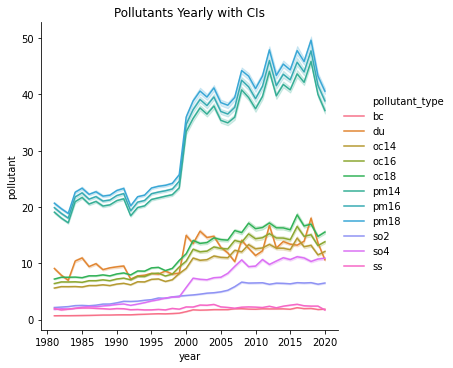

In [10]:
import seaborn as sns
#list_vars = 


sns_plot = sns.relplot(x="year", y="pollutant", kind="line", hue = "pollutant_type", data=df_olexiy).set(title='Pollutants Yearly with CIs')


#fig = sns_plot.get_figure()
sns_plot.savefig("/Users/shashanksingh/Desktop/air_pollution/results/figures_olexiy/pollutants.png")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
import geopandas as gpd
from nltk import FreqDist
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
#!pip install git+git://github.com/geopandas/geopandas.git
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install git+git://github.com/ResidentMario/geoplot.git

In [13]:
#!pip install geopandas
#!pip install descartes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_columns", None)
import geopandas as gpd
from nltk import FreqDist

In [15]:
#fp = "/Users/shashanksingh/Desktop/India_Pollution/01_Data/Analysis/raw_data/GIS_file_of_India_State,_District_and_Tehsil_Boundaries/commondata/ind_adm_shp/IND_adm3.shp"
#map_df = gpd.read_file(fp)

In [16]:
fp = "/Users/shashanksingh/Desktop/air_pollution/data/raw_data/WB_SHAPEFILES/approved_india_districts.shp"
map_df = gpd.read_file(fp)

In [17]:
#map_df

In [18]:
df_cases = pd.read_csv("/Users/shashanksingh/Desktop/air_pollution/data/processed_data/yearly_air.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (21,35,38,50,55,61,63,65,66,67,68,69,70,71,72,73,74,75,76,77,90,92,95,101,103,105,106,109,110,111,112,113,114,115,116,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,142,143,144,150,151,152,153,154,155,158,161,198,199,200,231) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
#df_cases = pd.read_csv("/Users/shashanksingh/Desktop/India_Pollution/shashank_analysis/processed_data/case_data_final.csv")

In [20]:
len(df_cases)

54012

In [21]:
df_cases = df_cases.drop_duplicates(["Kanoon_ID"], keep = "first")

In [22]:
len(df_cases)

1708

## Analysing overall case data first - 

In [23]:
df_cases["case_present"] = 1
df_cases["district"] = df_cases["district_x"]

In [24]:
df_plot_orig = df_cases[["district", "case_present", "delivery_year"]]

In [25]:
df_plot = df_plot_orig
map_df["NAME_2"] = map_df["ADM2_NAME"]

In [26]:
map_df["NAME_2"] = map_df["NAME_2"].apply(lambda x : str(x).lower())

In [27]:
list_map_districts = list(map_df["NAME_2"].unique())

In [28]:
from fuzzywuzzy import fuzz

In [29]:
def map_district(string_var):
    cache = 0
    flag = 0
        
    for map_district in list_map_districts:
        score = fuzz.token_set_ratio(string_var, map_district) 
        
        if (score > 90 and score > cache):
            flag = 1
            cache = score
            final_district = map_district
            final_district = final_district.strip()
            
    string_var = string_var.strip()
            
    if flag == 1:
        return final_district
    else:
        return string_var # returning the same district in case of no match

In [30]:
df_plot["map_district"] = df_plot["district"].apply(lambda x : map_district(str(x)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_plot = df_plot[df_plot["map_district"].notnull()]
df_plot = df_plot.sort_values(["map_district"])
dict_prop = {}
dict_tot = {}
mapped_ds = list(df_plot["map_district"].unique())
for dist in mapped_ds:
    
    df_temp = df_plot[df_plot["map_district"]==dist]
    
    prop = len(df_temp)/len(df_plot)
    
    dict_prop[dist] = prop
    dict_tot[dist] = len(df_temp)
    

    
df_plot["proportion"] = df_plot["map_district"].apply(lambda x : dict_prop[x])
df_plot["total_cases_per_district"] = df_plot["map_district"].apply(lambda x : dict_tot[x])
df_plot_orig = df_plot
df_plot = df_plot.drop_duplicates(["map_district"], keep="first")


In [32]:
merged = pd.merge(map_df,df_plot, left_on = "NAME_2", right_on = "map_district", how = "left")

In [33]:

merged["case_present"] = merged["case_present"].fillna(0)

In [34]:
import tqdm

In [35]:
list_status = []
list_prop = []
for index in tqdm.trange(len(merged)):
    
    poll_present = merged["case_present"][index]
    map_d = str(merged["map_district"][index]).lower()
    prop = merged["proportion"][index]
    
    if(poll_present == 1):
        status = "Case Present"
    
    if(poll_present == 0):
        status = "Case Not Present"
        
    if(map_d == "nan"):
        status = "Case Not Present"
        
    if(str(prop).lower()=="nan"):
        
        list_prop.append(0)
        
    else:
        list_prop.append(prop)
    
    list_status.append(status)

100%|██████████| 642/642 [00:00<00:00, 38146.24it/s]


In [36]:
merged["status"] = list_status
merged["proportion"] = list_prop
a = merged[merged["status"] != "Case Not Present"]
len(a["NAME_2"].unique())
merged["total_cases_per_district"] = merged["total_cases_per_district"].fillna(0)

In [37]:
merged.describe()

,OBJECTID,ADM2_CODE,STR2_YEAR,EXP2_YEAR,ADM1_CODE,ADM0_CODE,Shape_Leng,Shape_Le_1,Shape_Area,case_present,delivery_year,proportion,total_cases_per_district
count,642.000,642.000,642.000,642.000,642.000,642.000,642.000,642.000,642.000,642.000,237.000,642.000,642.000
mean,30287.696,41406.774,1384.978,3000.000,29258.329,115.000,4.431,4.432,0.422,0.371,2011.013,0.002,2.757
std,249.178,26423.098,485.624,0.000,31705.947,0.000,3.337,3.337,0.405,0.483,8.122,0.006,9.629
min,29934.000,17545.000,1000.000,3000.000,1484.000,115.000,0.028,0.028,0.000,0.000,1981.000,0.000,0.000
25%,30094.250,17729.250,1000.000,3000.000,1498.000,115.000,2.787,2.787,0.185,0.000,2008.000,0.000,0.000
50%,30254.500,17917.500,1000.000,3000.000,1508.000,115.000,3.954,3.954,0.334,0.000,2013.000,0.000,0.000
75%,30414.750,70208.750,1997.000,3000.000,70075.000,115.000,5.625,5.625,0.554,1.000,2017.000,0.001,1.000
max,30871.000,72851.000,2004.000,3000.000,70082.000,115.000,55.351,55.351,4.446,1.000,2020.000,0.078,133.000


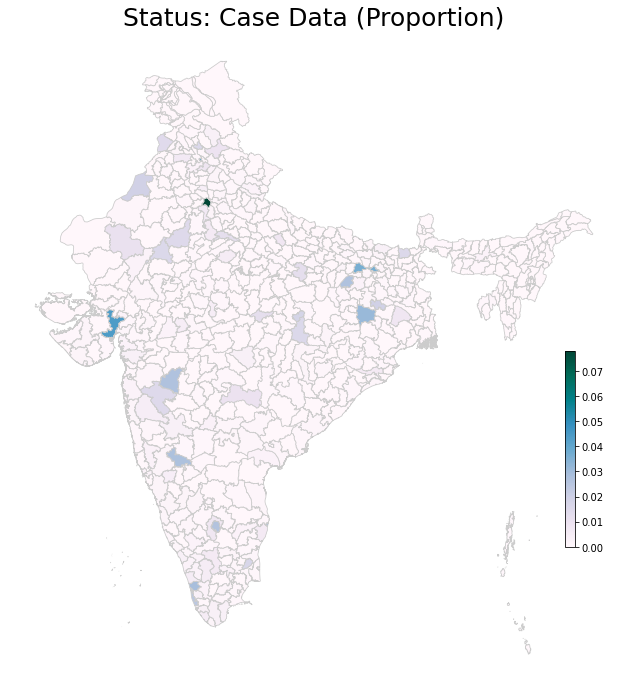

In [38]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Status: Case Data (Proportion)', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged_yearly = merged
#merged.plot(column='proportion', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
merged.plot(column = 'proportion', cmap = 'PuBuGn', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True,
           legend_kwds = {'anchor': (0,0.3), 'shrink': 0.3, 'pad':-0.05})
fig.savefig("/Users/shashanksingh/Desktop/air_pollution/results/figures_olexiy/proportion_of_cases.png")

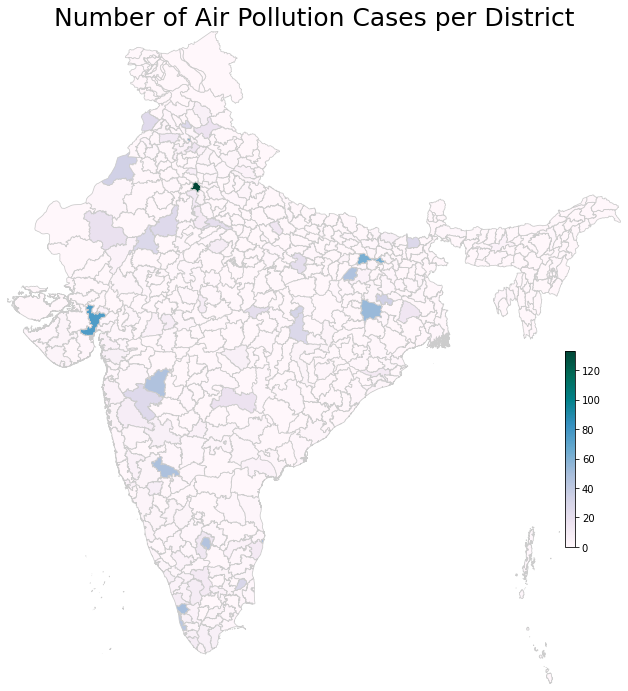

In [39]:
fig, ax = plt.subplots(1, figsize = (20, 12))
ax.axis('off')
ax.margins(0)
ax.set_title('Number of Air Pollution Cases per District',
             fontdict = {'fontsize': '25', 'fontweight' : '3'})

#merged["tot_cases_present"] = merged["tot_cases_present"].fillna(0)

merged.plot(column = 'total_cases_per_district', cmap = 'PuBuGn', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True,
           legend_kwds = {'anchor': (0,0.3), 'shrink': 0.3, 'pad':-0.05})

#bbox = ax.get_window_extent().inverse_transformed(fig.dpi_scale_trans)
                        
fig.savefig("/Users/shashanksingh/Desktop/air_pollution/results/figures_olexiy/total_number_of_cases_per_district.png")

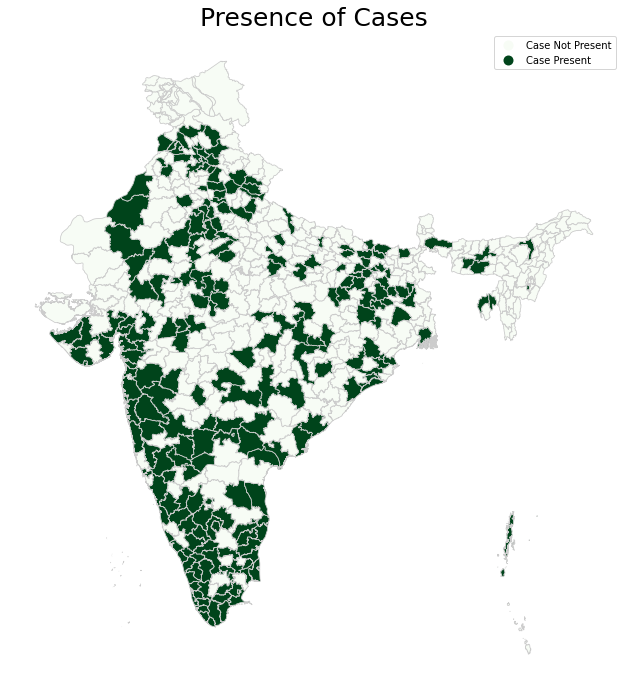

In [40]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Presence of Cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged_yearly = merged
#merged.plot(column='status', cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
merged.plot(column = 'status', cmap = 'Greens', linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
fig.savefig("/Users/shashanksingh/Desktop/air_pollution/results/figures_olexiy/presence_of_cases.png")

In [41]:
merged

,OBJECTID,ADM2_CODE,ADM2_NAME,STR2_YEAR,EXP2_YEAR,ADM1_CODE,ADM1_NAME,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,Shape_Leng,Shape_Le_1,Shape_Area,geometry,NAME_2,district,case_present,delivery_year,map_district,proportion,total_cases_per_district,status
0,29934,17545,Andaman Islands,1000,3000,1484,Andaman and Nicobar,Member State,NO,115,India,22.551,22.551,0.482,"MULTIPOLYGON (((92.52430 10.89605, 92.52431 10...",andaman islands,andaman islands,1.000,NaN,andaman islands,0.001,1.000,Case Present
1,29935,17546,Nicobar Islands,1000,3000,1484,Andaman and Nicobar,Member State,NO,115,India,6.200,6.200,0.141,"MULTIPOLYGON (((93.71246 7.22459, 93.71283 7.2...",nicobar islands,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present
2,29936,17547,Adilabad,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,8.104,8.104,1.379,"POLYGON ((78.84434 19.75900, 78.84563 19.75835...",adilabad,adilabad,1.000,2018.000,adilabad,0.010,17.000,Case Present
3,29937,17548,Anantapur,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,11.942,11.942,1.612,"POLYGON ((78.13678 14.93803, 78.13632 14.93281...",anantapur,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present
4,29938,17549,Chittoor,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,10.154,10.154,1.266,"POLYGON ((79.43324 13.87771, 79.43959 13.88052...",chittoor,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,30867,72842,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.662,0.662,0.014,"POLYGON ((75.49429 33.03980, 75.45941 33.05724...",administrative unit not available,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present
638,30868,72843,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,1.812,1.812,0.058,"POLYGON ((75.32959 32.65080, 75.30600 32.64743...",administrative unit not available,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present
639,30869,72849,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.222,0.222,0.002,"POLYGON ((74.66194 33.00337, 74.66127 33.00232...",administrative unit not available,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present
640,30870,72850,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.323,0.323,0.005,"POLYGON ((74.41690 32.90102, 74.41389 32.90395...",administrative unit not available,NaN,0.000,NaN,NaN,0.000,0.000,Case Not Present


In [42]:
from nltk import FreqDist

In [43]:
FreqDist(df_plot_orig['district']).most_common()

[('delhi', 133),
 ('ahmadabad', 75),
 ('chandigarh', 66),
 ('patna', 62),
 ('ranchi', 53),
 ('ernakulam', 49),
 ('chennai', 48),
 ('bagalkot', 47),
 ('aurangabad', 46),
 ('bangalore urban', 45),
 ('alappuzha', 42),
 ('bokaro', 33),
 ('ganganagar', 33),
 ('anuppur', 31),
 ('ariyalur', 29),
 ('ajmer', 27),
 ('bilaspur', 27),
 ('araria', 26),
 ('ahmednagar', 25),
 ('jaipur', 25),
 ('amritsar', 24),
 ('agra', 21),
 ('allahabad', 21),
 ('jabalpur', 21),
 ('mumbai city', 21),
 ('kolkata', 19),
 ('jodhpur', 18),
 ('adilabad', 17),
 ('shimla', 16),
 ('ambala', 15),
 ('bankura', 14),
 ('lucknow', 14),
 ('bangalore rural', 13),
 ('hyderabad', 12),
 ('gurgaon', 11),
 ('ludhiana', 11),
 ('bharatpur', 10),
 ('cuttack', 10),
 ('erode', 10),
 ('kancheepuram', 10),
 ('coimbatore', 9),
 ('gwalior', 9),
 ('thiruvananthapuram', 9),
 ('thrissur', 9),
 ('bhopal', 8),
 ('indore', 8),
 ('pune', 8),
 ('dharwad', 7),
 ('panipat', 7),
 ('kollam', 6),
 ('kottayam', 6),
 ('kozhikode', 6),
 ('kullu', 6),
 ('madhub

In [44]:
df_plot_orig[df_plot_orig["district"]=="delhi"]

,district,case_present,delivery_year,map_district,proportion,total_cases_per_district
30149,delhi,1,1994.000,delhi,0.078,133
30142,delhi,1,1988.000,delhi,0.078,133
30143,delhi,1,1989.000,delhi,0.078,133
30144,delhi,1,1989.000,delhi,0.078,133
30146,delhi,1,1991.000,delhi,0.078,133
...,...,...,...,...,...,...
30205,delhi,1,2015.000,delhi,0.078,133
30206,delhi,1,2016.000,delhi,0.078,133
30208,delhi,1,2016.000,delhi,0.078,133
30207,delhi,1,2016.000,delhi,0.078,133


In [45]:
map_df

,OBJECTID,ADM2_CODE,ADM2_NAME,STR2_YEAR,EXP2_YEAR,ADM1_CODE,ADM1_NAME,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,Shape_Leng,Shape_Le_1,Shape_Area,geometry,NAME_2
0,29934,17545,Andaman Islands,1000,3000,1484,Andaman and Nicobar,Member State,NO,115,India,22.551,22.551,0.482,"MULTIPOLYGON (((92.52430 10.89605, 92.52431 10...",andaman islands
1,29935,17546,Nicobar Islands,1000,3000,1484,Andaman and Nicobar,Member State,NO,115,India,6.200,6.200,0.141,"MULTIPOLYGON (((93.71246 7.22459, 93.71283 7.2...",nicobar islands
2,29936,17547,Adilabad,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,8.104,8.104,1.379,"POLYGON ((78.84434 19.75900, 78.84563 19.75835...",adilabad
3,29937,17548,Anantapur,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,11.942,11.942,1.612,"POLYGON ((78.13678 14.93803, 78.13632 14.93281...",anantapur
4,29938,17549,Chittoor,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,10.154,10.154,1.266,"POLYGON ((79.43324 13.87771, 79.43959 13.88052...",chittoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,30867,72842,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.662,0.662,0.014,"POLYGON ((75.49429 33.03980, 75.45941 33.05724...",administrative unit not available
638,30868,72843,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,1.812,1.812,0.058,"POLYGON ((75.32959 32.65080, 75.30600 32.64743...",administrative unit not available
639,30869,72849,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.222,0.222,0.002,"POLYGON ((74.66194 33.00337, 74.66127 33.00232...",administrative unit not available
640,30870,72850,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.323,0.323,0.005,"POLYGON ((74.41690 32.90102, 74.41389 32.90395...",administrative unit not available


In [46]:
#merged[merged["map_district"]=="raigarh"]

In [47]:
fp = "/Users/shashanksingh/Desktop/air_pollution/data/raw_data/WB_SHAPEFILES/approved_india_districts.shp"
map_df = gpd.read_file(fp)

In [48]:
map_df

,OBJECTID,ADM2_CODE,ADM2_NAME,STR2_YEAR,EXP2_YEAR,ADM1_CODE,ADM1_NAME,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,29934,17545,Andaman Islands,1000,3000,1484,Andaman and Nicobar,Member State,NO,115,India,22.551,22.551,0.482,"MULTIPOLYGON (((92.52430 10.89605, 92.52431 10..."
1,29935,17546,Nicobar Islands,1000,3000,1484,Andaman and Nicobar,Member State,NO,115,India,6.200,6.200,0.141,"MULTIPOLYGON (((93.71246 7.22459, 93.71283 7.2..."
2,29936,17547,Adilabad,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,8.104,8.104,1.379,"POLYGON ((78.84434 19.75900, 78.84563 19.75835..."
3,29937,17548,Anantapur,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,11.942,11.942,1.612,"POLYGON ((78.13678 14.93803, 78.13632 14.93281..."
4,29938,17549,Chittoor,1000,3000,1485,Andhra Pradesh,Member State,NO,115,India,10.154,10.154,1.266,"POLYGON ((79.43324 13.87771, 79.43959 13.88052..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,30867,72842,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.662,0.662,0.014,"POLYGON ((75.49429 33.03980, 75.45941 33.05724..."
638,30868,72843,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,1.812,1.812,0.058,"POLYGON ((75.32959 32.65080, 75.30600 32.64743..."
639,30869,72849,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.222,0.222,0.002,"POLYGON ((74.66194 33.00337, 74.66127 33.00232..."
640,30870,72850,Administrative unit not available,1000,3000,40431,Administrative unit not available,Sovereignty unsettled,YES,115,India,0.323,0.323,0.005,"POLYGON ((74.41690 32.90102, 74.41389 32.90395..."


In [49]:
df_plot_orig.to_csv("district_years_with_cases.csv")